In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [41]:
eps = np.log(3)

def noise(value, e, S):
    #var = 2.0*(S/e)**2.0
    var = float(S)/float(e)
    n = np.random.laplace(0,var)
    return value + n

def interval(queries, conf=0.95):
    return st.t.interval(conf, len(queries)-1, loc=np.mean(queries), scale=st.sem(queries))

In [25]:
def simulation(ground_truth, n=10, eps=np.log(3), S=1):
    queries = [noise(ground_truth, eps, S)]
    results = []
    for i in range(2,n+1):
        queries.append(noise(ground_truth, eps, S))
        m = np.mean(queries)
        result = {
            "i": i,
            "mean": m,
            "interval": interval(queries),
            "within_one": (ground_truth-m < (S/2)) and (ground_truth-m > -(S/2))
        }
        results.append(result)
        
    return results, queries

In [6]:
def gen_bars(simulations):
    x = [i['i'] for i in simulations]
    y = [i['mean'] for i in simulations]
    e = ([abs(i['interval'][0]-i['mean']) for i in simulations], [abs(i['interval'][1]-i['mean']) for i in simulations])

    return (x,y,e)

In [32]:
def generate_graph(sims, title, truth, S):
    e1 = []
    e2 = []
    for e in sims:
        if e['within_one']:
            e1.append(e)
        else:
            e2.append(e)

    bars1 = gen_bars(e1)
    bars2 = gen_bars(e2)
    beingsaved = plt.figure(figsize=(10,6))
    plt.xscale('log')
    plt.xlabel('Number of Queries')
    plt.ylabel('Estimates')
    plt.axhline(y=truth, color='b', linestyle='-', label="ground truth")
    plt.errorbar(bars1[0], bars1[1], yerr=bars1[2], fmt='o', c='red', label=f"Estimate within {S}")
    plt.errorbar(bars2[0], bars2[1], yerr=bars2[2], fmt='o', c='green', label=f"Estimate outside {S}")
    plt.legend()
    plt
    beingsaved.savefig(title+'.eps',format='eps', dpi=1000, bbox_inches='tight')

In [24]:
#sims = simulation(3, 200, np.log(3), 1)
#generate_graph(sims,'./plots/3-200-ln3-1')

<IPython.core.display.Javascript object>


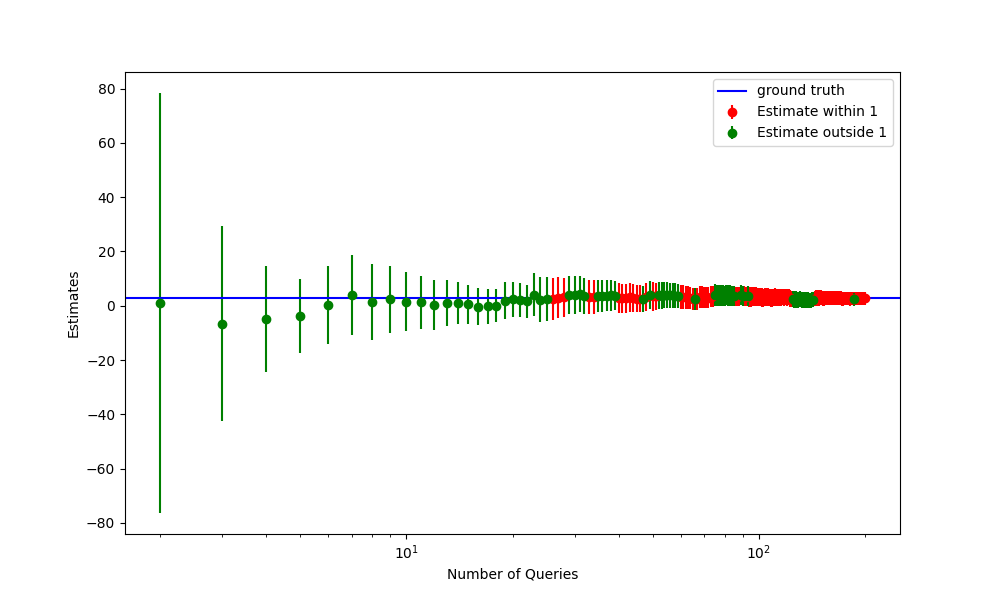

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [26]:
sims = simulation(3, 200, 0.4, 1)
generate_graph(sims,'./plots/3-200-0.5-1')

<IPython.core.display.Javascript object>


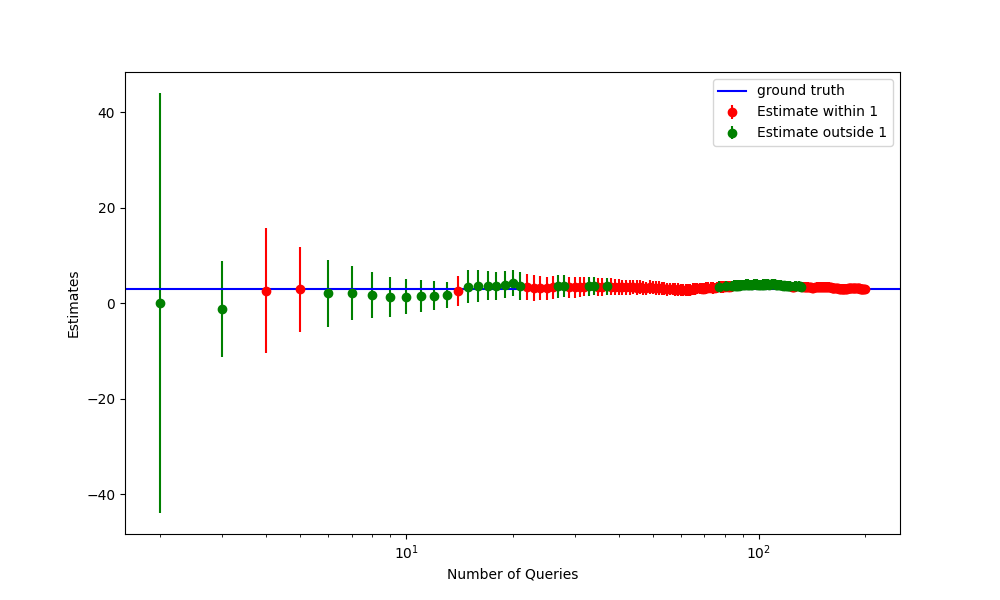

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [27]:
sims = simulation(3, 200, 0.7, 1)
generate_graph(sims,'./plots/3-200-0.7-1')

<IPython.core.display.Javascript object>


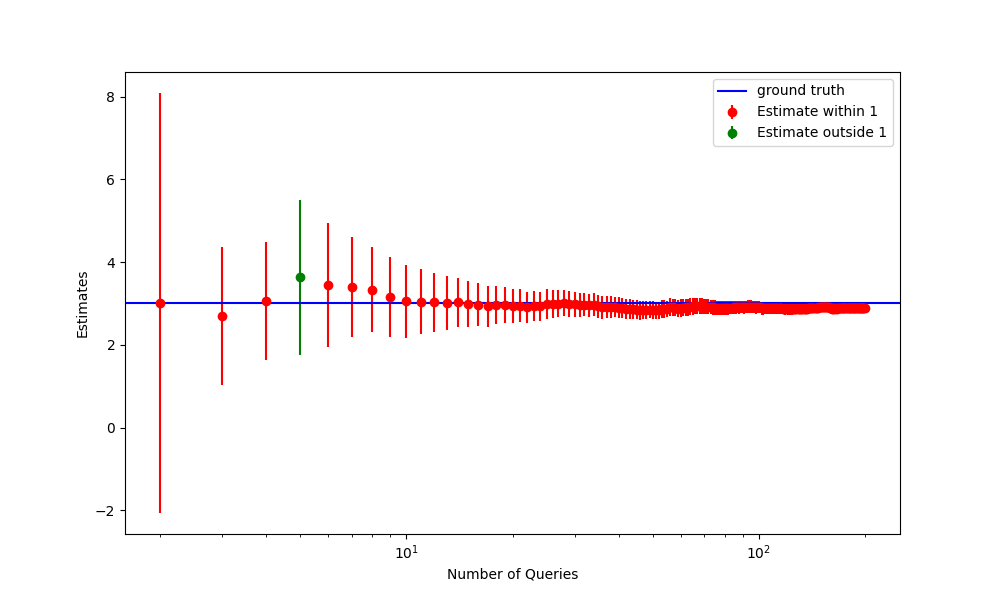

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [28]:
sims = simulation(3, 200, 2, 1)
generate_graph(sims,'./plots/3-200-2-1')

1.0986122886681098

## Get the sum of the total number of tests

<IPython.core.display.Javascript object>


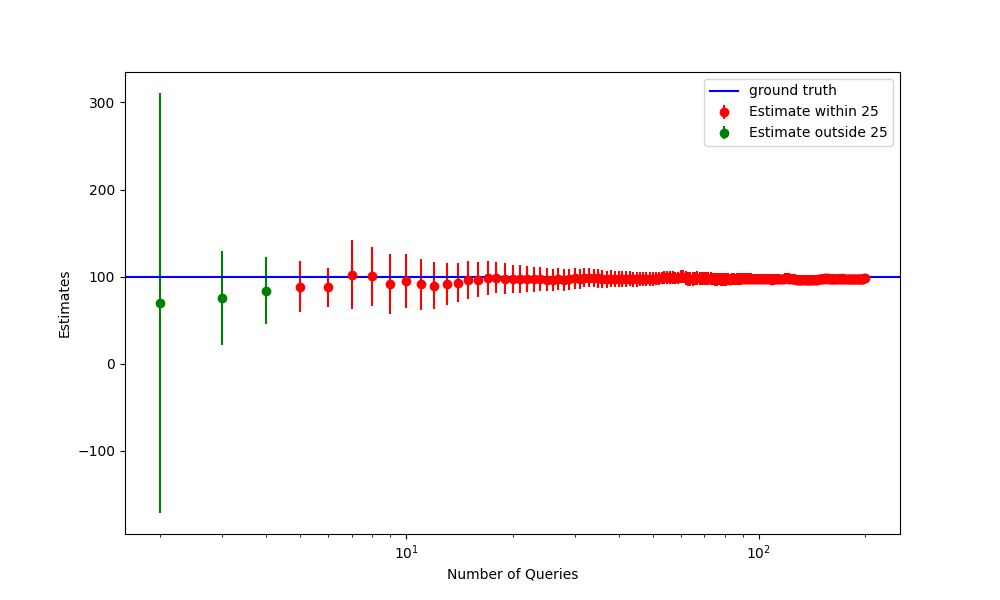

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [50]:
sims = simulation(100, 200, np.log(3), 25)
ests = sims[0]
generate_graph(ests,'./plots/test1', 100, 25)

In [51]:
sims[1]

[50.86662912310887,
 88.81070036192308,
 88.19701244519317,
 108.20666935746077,
 107.49447532539428,
 82.956571938188,
 189.18163020407968,
 86.57080596237238,
 24.588434190397834,
 124.62928383584676,
 53.59174325910248,
 72.80273944548712,
 115.39236856844859,
 113.83940124414023,
 135.52217999112713,
 103.36894970263691,
 126.62227452137782,
 111.34646601435765,
 73.78374603698519,
 91.06994470307684,
 94.62526403323083,
 105.00073420767018,
 86.50299354749528,
 101.25415203426351,
 82.84607565642018,
 74.19010598388351,
 140.57075020548245,
 68.18931123692414,
 115.34545633990746,
 127.3262271143126,
 82.3309027214216,
 143.60197318716797,
 88.10119112177398,
 94.6310451901465,
 75.56373276495373,
 90.57078374798718,
 76.9165037392043,
 125.23764513292721,
 82.02396421016455,
 108.727304564552,
 75.55400907979998,
 96.91286841592964,
 108.44627758988229,
 70.69439685632118,
 94.44803336977778,
 104.52401091268855,
 99.90179818247873,
 99.17697072936777,
 109.78896341811648,
 94.84

## Get the count of the number of positive test results

<IPython.core.display.Javascript object>


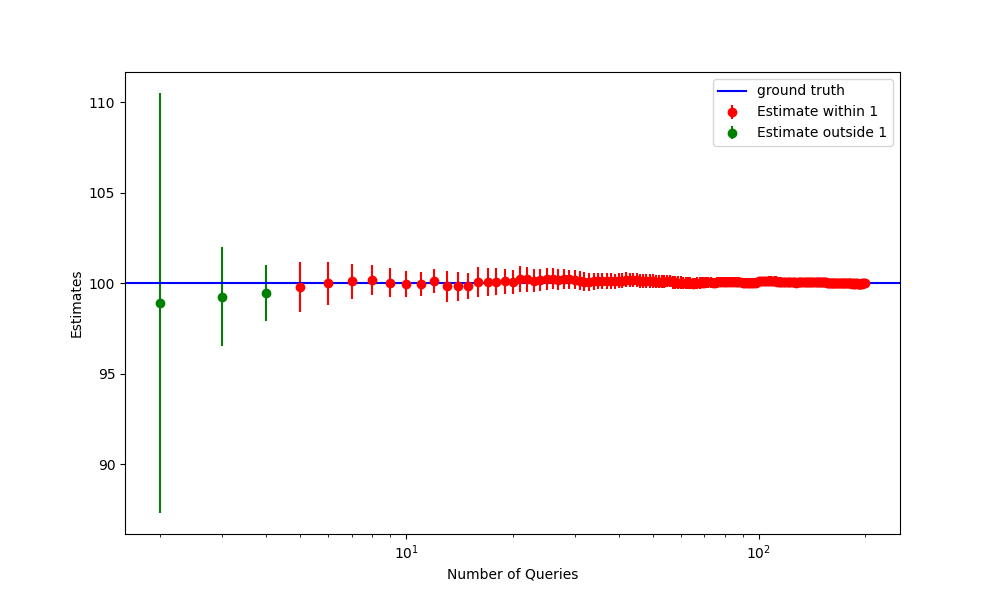

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [56]:
sims = simulation(100, 200, np.log(3), 1)
ests = sims[0]
generate_graph(ests,'./plots/query2', 100, 1)

In [57]:
sims[1]

[99.82366669909058,
 97.99569397277706,
 99.97449982902596,
 100.06911518074402,
 101.06045263611307,
 101.06547441663841,
 100.76706310815331,
 100.74876899613285,
 98.80891476352592,
 99.4355891826155,
 99.87804117124936,
 101.76911317863143,
 96.51322497413446,
 99.63222273976595,
 100.30913476857407,
 103.5142722920314,
 99.74444331256072,
 100.55354625470636,
 100.46110021884199,
 99.65809715139184,
 103.28272344005678,
 99.5749929297026,
 98.68487853763493,
 100.92671914758637,
 101.72256440919986,
 100.49235180122356,
 99.05291324265747,
 101.10033287858143,
 99.7566597907634,
 99.86379161526129,
 97.85990663530261,
 99.0044157926033,
 99.69737338138798,
 100.88109627721228,
 100.70006887950368,
 99.63469569528004,
 101.35150897822943,
 99.29327959508036,
 99.70323079783586,
 101.51351463157674,
 99.58107836389712,
 102.43192461344962,
 99.76408170089991,
 99.82760365359334,
 100.96643462597237,
 97.36823693052092,
 101.0140697365829,
 99.6955808898376,
 100.42032247819762,
 99.

In [ ]:
## Get the count of the most tested postal code